
Initial population: 
GNOME     FITNESS VALUE

034210 31
034210 31
034210 31
034210 31
034210 31
034210 31
034210 31
034210 31
034210 31
034210 31


Current temp:  10000
Generation 1
GNOME     FITNESS VALUE
031240 32
031240 32
031240 32
043210 24
043210 24
031240 32
043210 24
043210 24
043210 24
043210 24

Current temp:  9000.0
Generation 2
GNOME     FITNESS VALUE
034210 31
042310 21
034210 31
034210 31
034210 31
013240 21
034210 31
013240 21
034210 31
034210 31

Current temp:  8100.0
Generation 3
GNOME     FITNESS VALUE
012340 24
043210 24
012340 24
043210 24
043210 24
043210 24
031240 32
043210 24
031240 32
031240 32

Current temp:  7290.0
Generation 4
GNOME     FITNESS VALUE
013240 21
013240 21
042310 21
042310 21
034210 31
034210 31
013240 21
034210 31
034210 31
034210 31

Current temp:  6561.0
Generation 5
GNOME     FITNESS VALUE
031240 32
031240 32
043210 24
043210 24
031240 32
031240 32
043210 24
043210 24
031240 32
031240 32
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135

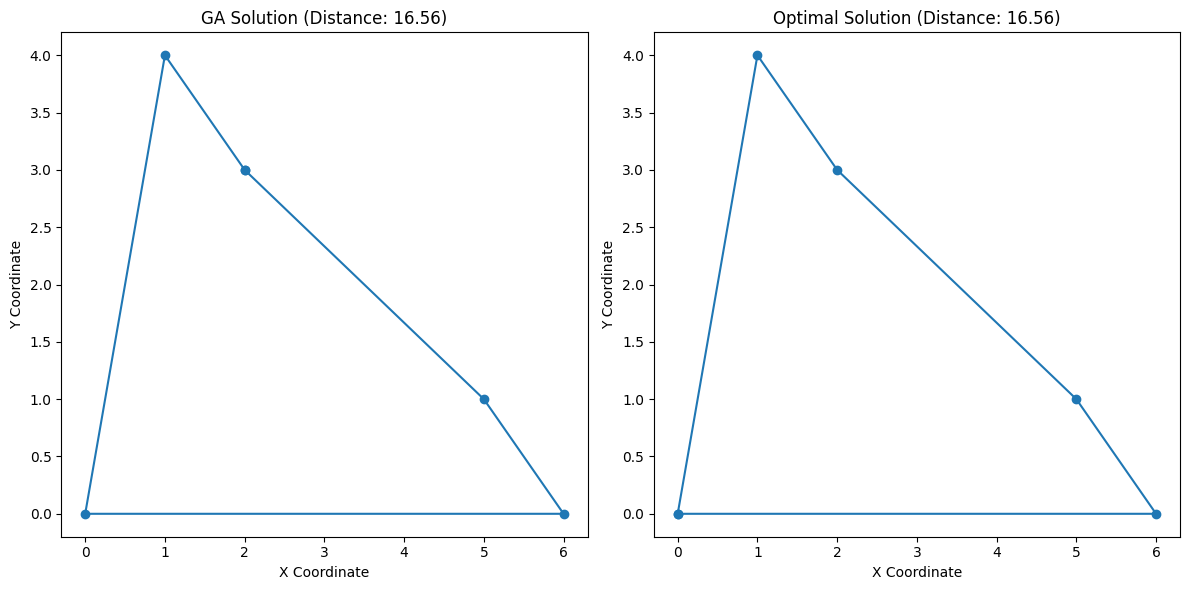

In [1]:
from random import randint

INT_MAX = 2147483647
# Number of cities in TSP
V = 5

# Names of the cities
GENES = "ABCDE"

# Starting Node Value
START = 0

# Initial population size for the algorithm
POP_SIZE = 10

# Structure of a GNOME
# defines the path traversed
# by the salesman while the fitness value
# of the path is stored in an integer


class individual:
    def __init__(self) -> None:
        self.gnome = ""
        self.fitness = 0

    def __lt__(self, other):
        return self.fitness < other.fitness

    def __gt__(self, other):
        return self.fitness > other.fitness


# Function to return a random number
# from start and end
def rand_num(start, end):
    return randint(start, end-1)


# Function to check if the character
# has already occurred in the string
def repeat(s, ch):
    for i in range(len(s)):
        if s[i] == ch:
            return True

    return False


# Function to return a mutated GNOME
# Mutated GNOME is a string
# with a random interchange
# of two genes to create variation in species
def mutatedGene(gnome):
    gnome = list(gnome)
    while True:
        r = rand_num(1, V)
        r1 = rand_num(1, V)
        if r1 != r:
            temp = gnome[r]
            gnome[r] = gnome[r1]
            gnome[r1] = temp
            break
    return ''.join(gnome)


# Function to return a valid GNOME string
# required to create the population
def create_gnome():
    gnome = "0"
    while True:
        if len(gnome) == V:
            gnome += gnome[0]
            break

        temp = rand_num(1, V)
        if not repeat(gnome, chr(temp + 48)):
            gnome += chr(temp + 48)

    return gnome


# Function to return the fitness value of a gnome.
# The fitness value is the path length
# of the path represented by the GNOME.
def cal_fitness(gnome):
    mp = [
        [0, 2, INT_MAX, 12, 5],
        [2, 0, 4, 8, INT_MAX],
        [INT_MAX, 4, 0, 3, 3],
        [12, 8, 3, 0, 10],
        [5, INT_MAX, 3, 10, 0],
    ]
    f = 0
    for i in range(len(gnome) - 1):
        if mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48] == INT_MAX:
            return INT_MAX
        f += mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48]

    return f


# Function to return the updated value
# of the cooling element.
def cooldown(temp):
    return (90 * temp) / 100


# Comparator for GNOME struct.
# def lessthan(individual t1,
#               individual t2)
# :
#     return t1.fitness < t2.fitness


# Utility function for TSP problem.
def TSPUtil(mp):
    # Generation Number
    gen = 1
    # Number of Gene Iterations
    gen_thres = 5

    population = []
    temp = individual()

    # Populating the GNOME pool.
    for i in range(POP_SIZE):
        temp.gnome = create_gnome()
        temp.fitness = cal_fitness(temp.gnome)
        population.append(temp)

    print("\nInitial population: \nGNOME     FITNESS VALUE\n")
    for i in range(POP_SIZE):
        print(population[i].gnome, population[i].fitness)
    print()

    found = False
    temperature = 10000

    # Iteration to perform
    # population crossing and gene mutation.
    while temperature > 1000 and gen <= gen_thres:
        population.sort()
        print("\nCurrent temp: ", temperature)
        new_population = []

        for i in range(POP_SIZE):
            p1 = population[i]

            while True:
                new_g = mutatedGene(p1.gnome)
                new_gnome = individual()
                new_gnome.gnome = new_g
                new_gnome.fitness = cal_fitness(new_gnome.gnome)

                if new_gnome.fitness <= population[i].fitness:
                    new_population.append(new_gnome)
                    break

                else:

                    # Accepting the rejected children at
                    # a possible probability above threshold.
                    prob = pow(
                        2.7,
                        -1
                        * (
                            (float)(new_gnome.fitness - population[i].fitness)
                            / temperature
                        ),
                    )
                    if prob > 0.5:
                        new_population.append(new_gnome)
                        break

        temperature = cooldown(temperature)
        population = new_population
        print("Generation", gen)
        print("GNOME     FITNESS VALUE")

        for i in range(POP_SIZE):
            print(population[i].gnome, population[i].fitness)
        gen += 1


mp = [
    [0, 2, INT_MAX, 12, 5],
    [2, 0, 4, 8, INT_MAX],
    [INT_MAX, 4, 0, 3, 3],
    [12, 8, 3, 0, 10],
    [5, INT_MAX, 3, 10, 0],
]
TSPUtil(mp)

!pip install deap

import random
import itertools
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Define cities as (x, y) coordinates
cities = np.array([
    [0, 0], [2, 3], [5, 1], [1, 4], [6, 0]
])

# Calculate the distance between two cities


def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Fitness evaluation: Total distance of the TSP route


def evaluate(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance(cities[individual[i]],
                                   cities[individual[i + 1]])
    # Add distance to return to the starting city
    total_distance += distance(cities[individual[-1]], cities[individual[0]])
    return (total_distance,)  # Return a tuple as required by DEAP

# Brute force to find the exact optimal solution


def brute_force_tsp(cities):
    num_cities = len(cities)
    all_routes = itertools.permutations(range(num_cities))  # All permutations
    min_distance = float("inf")
    best_route = None
    for route in all_routes:
        total_distance = 0
        for i in range(len(route) - 1):
            total_distance += distance(cities[route[i]], cities[route[i + 1]])
        # Add distance to return to the starting city
        total_distance += distance(cities[route[-1]], cities[route[0]])
        if total_distance < min_distance:
            min_distance = total_distance
            best_route = route
    return best_route, min_distance


# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness,
               weights=(-1.0,))  # Minimize distance
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate,
                 creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxOrdered)  # Ordered crossover for TSP
toolbox.register("mutate", tools.mutShuffleIndexes,
                 indpb=0.2)  # Shuffle mutation
toolbox.register("select", tools.selTournament,
                 tournsize=3)  # Tournament selection
toolbox.register("evaluate", evaluate)

# Run the Genetic Algorithm


def run_ga():
    population = toolbox.population(n=100)  # Population size
    ngen = 500  # Number of generations
    cxpb = 0.7  # Crossover probability
    mutpb = 0.2  # Mutation probability

    print("Running Genetic Algorithm...")
    result, _ = algorithms.eaSimple(
        population, toolbox, cxpb, mutpb, ngen, verbose=False
    )
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual


# Execute the Genetic Algorithm
best_individual = run_ga()

# Extract and display the GA solution
best_route = best_individual
shortest_distance_ga = evaluate(best_route)[0]

# Find the exact optimal solution using brute force
optimal_route, shortest_distance_optimal = brute_force_tsp(cities)

# Print results
print("\nGenetic Algorithm Solution:")
print("Best Route:", best_route)
print(f"Shortest Distance (GA): {shortest_distance_ga:.2f}")

print("\nOptimal Solution (Brute Force):")
print("Optimal Route:", optimal_route)
print(f"Shortest Distance (Optimal): {shortest_distance_optimal:.2f}")

# Visualize both solutions
route_ga = np.append(best_route, best_route[0])  # Include return to start
route_optimal = np.append(optimal_route, optimal_route[0])

plt.figure(figsize=(12, 6))

# Plot GA solution
plt.subplot(1, 2, 1)
x_coords_ga = cities[route_ga, 0]
y_coords_ga = cities[route_ga, 1]
plt.plot(x_coords_ga, y_coords_ga, marker="o")
plt.title(f"GA Solution (Distance: {shortest_distance_ga:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Plot Optimal solution
plt.subplot(1, 2, 2)
x_coords_optimal = cities[route_optimal, 0]
y_coords_optimal = cities[route_optimal, 1]
plt.plot(x_coords_optimal, y_coords_optimal, marker="o")
plt.title(f"Optimal Solution (Distance: {shortest_distance_optimal:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.tight_layout()
plt.show()

In [ ]:
import itertools


def tsp_brute_force(distances):
   n = len(distances)
   cities = range(n)
   min_path = None
   min_cost = float('inf')
  # Generate all possible permutations of cities
   for perm in itertools.permutations(cities):
       cost = 0
       for i in range(n - 1):
           cost += distances[perm[i]][perm[i + 1]]
       cost += distances[perm[-1]][perm[0]]  # Return to starting city
       if cost < min_cost:
           min_cost = cost
           min_path = perm
   return min_path, min_cost


if __name__ == "__main__":
   # Example distance matrix (4 cities)
   distances = [
       [0, 10, 15, 20],
       [10, 0, 35, 25],
       [15, 35, 0, 30],
       [20, 25, 30, 0]
   ]
   path, cost = tsp_brute_force(distances)
   print(f"Optimal path: {path}, Cost: {cost}")